# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple and apply a head()

In [3]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"
apple = pd.read_csv(url)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type and check the info()

In [5]:
apple['Date'] = pd.to_datetime(apple['Date'])

apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8465 non-null   datetime64[ns]
 1   Open       8465 non-null   float64       
 2   High       8465 non-null   float64       
 3   Low        8465 non-null   float64       
 4   Close      8465 non-null   float64       
 5   Volume     8465 non-null   int64         
 6   Adj Close  8465 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [6]:
# Cambiar la columna 'Date' a índice
apple.set_index("Date", inplace=True)

In [7]:
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


In [19]:
apple.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35


In [8]:
print(apple.index)

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)


### Step 7.  Is there any duplicate dates?

In [9]:
apple.duplicated().sum()

np.int64(0)

In [10]:
print(apple.index)

DatetimeIndex(['2014-07-08', '2014-07-07', '2014-07-03', '2014-07-02',
               '2014-07-01', '2014-06-30', '2014-06-27', '2014-06-26',
               '2014-06-25', '2014-06-24',
               ...
               '1980-12-26', '1980-12-24', '1980-12-23', '1980-12-22',
               '1980-12-19', '1980-12-18', '1980-12-17', '1980-12-16',
               '1980-12-15', '1980-12-12'],
              dtype='datetime64[ns]', name='Date', length=8465, freq=None)


In [11]:
apple.index.duplicated().sum()

np.int64(0)

In [20]:
apple.index.duplicated().any()

np.False_

In [12]:
print(apple.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [13]:
# Con apply aplicamos una función a lo largo de las columnas del df
# lambda define una función anónima que toma una columna (col) como argumento.
# col.duplicated() devuelve una Serie booleana donde True indica que el valor en esa posición es duplicado dentro de la columna.
# y con sum contamos la cantidad de True.
apple.apply(lambda col: col.duplicated().sum())


Open         4721
High         4799
Low          4813
Close        4631
Volume        550
Adj Close    6140
dtype: int64

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [14]:
# Lo hacemos ordenando el índice con sort_index
apple = apple.sort_index(ascending=True)
apple

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [15]:
# Obtener el último día hábil de cada mes
# Con resample agrupamos por el último día hábil. Y con last seleccionamos la última fila de cada grupo.
last_business_days = apple.resample('BME').last()

print(last_business_days.head())

             Open   High    Low  Close    Volume  Adj Close
Date                                                       
1980-12-31  34.25  34.25  34.13  34.13   8937600       0.53
1981-01-30  28.50  28.50  28.25  28.25  11547200       0.44
1981-02-27  26.50  26.75  26.50  26.50   3690400       0.41
1981-03-31  24.75  24.75  24.50  24.50   3998400       0.38
1981-04-30  28.38  28.62  28.38  28.38   3152800       0.44


In [26]:
apple.asfreq("BME")

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600.0,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200.0,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400.0,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400.0,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800.0,0.44
...,...,...,...,...,...,...
2014-02-28,529.08,532.75,522.12,526.24,92992200.0,74.76
2014-03-31,539.23,540.81,535.93,536.74,42167300.0,76.25
2014-04-30,592.64,599.43,589.80,590.09,114160200.0,83.83


### Step 10.  What is the difference in days between the first day and the oldest

In [16]:
# Obtener la fecha más reciente y la más antigua
first_day = apple.index.max() # Fecha más reciente
oldest_day = apple.index.min() # Fecha más antigua

# Calcular la diferencia en días
difference_days = (first_day - oldest_day).days # .days extrae la cantidad de días enteros de la diferencia entre first_day y oldest_day.

print(f"Diferencia en días: {difference_days}")


Diferencia en días: 12261


### Step 11.  How many months in the data we have?

In [17]:
# Como la columna Date es el index lo hago con apple.index (DatetimeIndex)
# .to_period("M"): Convierte cada fecha en el índice a un período de mes ("M" significa que solo se tomará el año y el mes, ignorando el día).
unique_months = apple.index.to_period("M").nunique()

print("El número de meses que hay en los datos es:", unique_months)


El número de meses que hay en los datos es: 404


### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

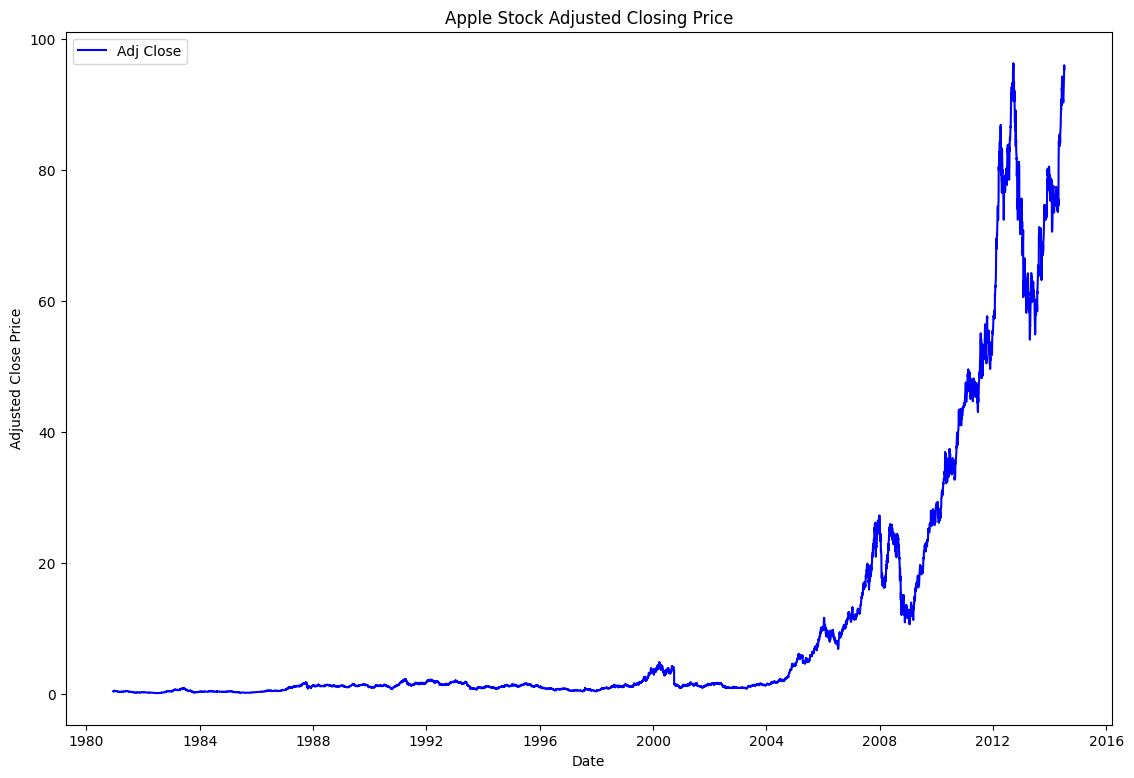

In [18]:

# Tamaño de la figura
plt.figure(figsize=(13.5, 9))

# aplple index(fecha) va en el eje x. La columna Adj Close va en el eje y (precio cierre acciones de Apple)
plt.plot(apple.index, apple['Adj Close'], label="Adj Close", color="blue")

# Títulos y etiquetas
plt.title("Apple Stock Adjusted Closing Price")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()


plt.show()
